In [1]:
import numpy as np

from matplotlib import pyplot as plt

from SOL.discrete_bounding import (
    bound_discrete_gurobi, bound_discrete_scipy, bound_discrete_bisect,
    bound_discrete_linear_LP, bound_discrete_linear_LP_cpp_1d, bound_discrete_two_sides)
from SOL.data_processing import generate_dataset

### A couple of plots

Metod bound_discrete_scipy, upper bound [0.61272815 0.17573993], lower_bound [ 0.71043931 -0.11078681]


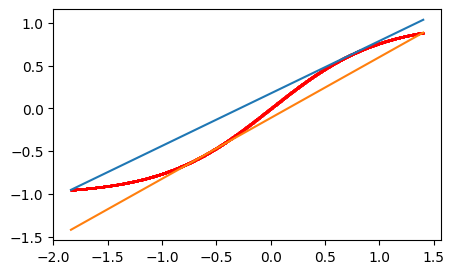

Metod bound_discrete_bisect, upper bound [0.61260157 0.17637183], lower_bound [ 0.71039602 -0.11083981]


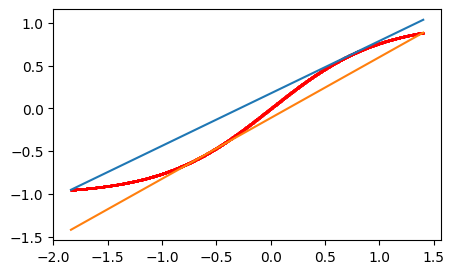

Metod bound_discrete_linear_LP, upper bound [0.61273911 0.17576636], lower_bound [ 0.71050677 -0.11088146]


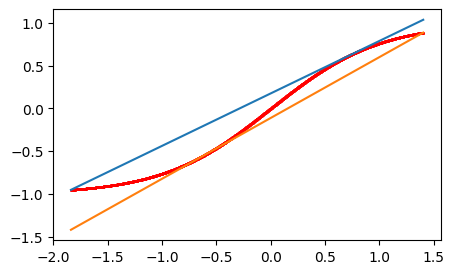

Metod bound_discrete_linear_LP_cpp_1d, upper bound [0.61274156 0.17576458], lower_bound [ 0.71043932 -0.11078682]


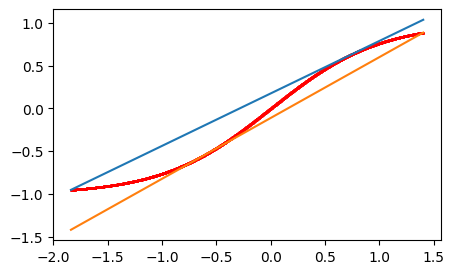

In [2]:
datasets = generate_dataset(1, 10 ** 4, [np.tanh])
boundaries, points, values = datasets[0][0][0], datasets[0][1][0], datasets[0][2][0]

x = np.linspace(boundaries[0], boundaries[1], 100)

for method in [bound_discrete_scipy, bound_discrete_bisect, bound_discrete_linear_LP, bound_discrete_linear_LP_cpp_1d]:
    upper_bound, lower_bound = bound_discrete_two_sides(boundaries, points, values, method, eps=1e-3)
    print('Metod {}, upper bound {}, lower_bound {}'.format(method.__name__, upper_bound, lower_bound))
    
    plt.figure(figsize=(5, 3))
    plt.scatter(points, values, s=0.2, c='red')
    plt.plot(x, x * upper_bound[0] + upper_bound[1])
    plt.plot(x, x * lower_bound[0] + lower_bound[1])
    plt.show()

### A couple of profiles

In [8]:
from timeit import timeit

In [13]:
datasets = generate_dataset(1, 10 ** 4, [np.tanh])
boundaries, points, values = datasets[0][0][0], datasets[0][1][0], datasets[0][2][0]

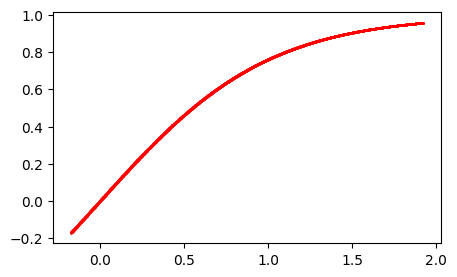

In [14]:
plt.figure(figsize=(5, 3))
plt.scatter(points, values, s=0.2, c='red')
plt.show()

In [3]:
# %timeit bound_discrete_two_sides(boundaries, points, values, bound_discrete_gurobi)

In [16]:
%timeit bound_discrete_two_sides(boundaries, points, values, bound_discrete_scipy)

16.1 ms ± 469 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit bound_discrete_two_sides(boundaries, points, values, bound_discrete_bisect)

838 µs ± 3.49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%timeit bound_discrete_two_sides(boundaries, points, values, bound_discrete_linear_LP)

5.62 ms ± 69.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit bound_discrete_two_sides(boundaries, points, values, bound_discrete_linear_LP_cpp_1d)

11 ms ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
